# Tree Based Classifiers

In [2]:
#importing all libraries
import numpy as ny
import pandas as pa
import sklearn.datasets
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as pt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#loading of data
func= load_iris()


1. Train the model on 80% of data set
2. split the entire data set in 20% test and 80% train sets

In [4]:
#splitting of data(80% train and 20% test)
x=func.data
y=func.target
A_train, A_test, B_train, B_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Decision Tree

In [5]:
#Training the model
Dtc= DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=2,max_depth=None,max_features=None,max_leaf_nodes=None,random_state=42)
Dtc.fit(A_train,B_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

1. Consider a value of max_depth from max_depth set
2. Perform Cross Validation on the model for 80% of train data
3. For each value of max_depth the model gives the  mean accuracy scores
4. All the values of max_depth and  mean accuracies are stored in data frame and printed as below.

In [6]:
result_list=[]
#for None value
Dtc= DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=2,max_depth=None,max_features=None,max_leaf_nodes=None,random_state=42)
Dtc.fit(A_train,B_train)
value_None=cross_val_score(Dtc,A_train,B_train,cv=10)
#for integer values
max_depth=[3,5,10]
for i in max_depth:
        Dtc= DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=2,max_depth=i,max_features=None,max_leaf_nodes=None,random_state=42)
        Dtc.fit(A_train,B_train)
        val=cross_val_score(Dtc,A_train,B_train,cv=10)
        result_list.append(val.mean())

max_depth.append('None')  
result_list.append(value_None.mean())
df= pa.DataFrame(result_list,max_depth,columns = ['Accuracy scores'])
df = df.rename_axis('max_depth')
df

,Accuracy scores
max_depth,
3,0.933333
5,0.916667
10,0.925000
None,0.925000


Text(0, 0.5, 'Accuracy')

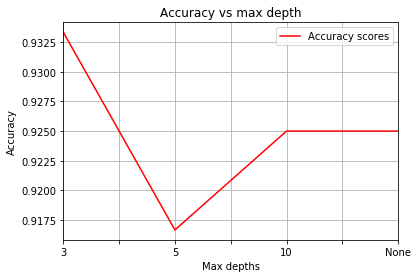

In [7]:
#Plotting graph for above tabular data
df.plot(color='red')
pt.grid()
pt.title('Accuracy vs max depth')
pt.xlabel('Max depths')
pt.ylabel('Accuracy')


1. The maximum accuracy(0.933333) is obtained when maximum depth is 3.
2. By having a low values of max depth which controls complexity and overfitting of decision tree

# Random Forest

In [8]:
#Training the model
Rfc=RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42)
Rfc.fit(A_train,B_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

1. Consider a value of max_depth from max_depth set
2. Consider a value of number_tree from number_tree set
3. Perform Cross Validation on the model for 80% of train data
4. For each value of max_depth and n_estimators the model gives the  mean accuracy scores
5. All the values of max_depth, n_estimators and  mean accuracies are stored in data frame and printed as below.

In [9]:
#For different values of n estimator and maximum depths
result_list = []
result={}
input_val=[]
w=5
h=5
Matrix=[[0 for x in range(w)] for y in range(h)] 
number_tree=[5,10,50,150,200]
max_depth=[3,5,10,None]
for i in number_tree:
    for j in max_depth:
        Rfc=RandomForestClassifier(n_estimators=i,max_depth=j,random_state=42)
        Rfc.fit(A_train,B_train)
        val=cross_val_score(Rfc,A_train,B_train,cv=10)
        val.mean()
        result_list.append(val.mean())
#print(result_list)
for i in number_tree:
    for j in max_depth:
        result={i,j}
        input_val.append(result)
df= pa.DataFrame(result_list,input_val,columns = ['Mean Accuracy scores'])
df = df.rename_axis('{depth,tree}')
df

,Mean Accuracy scores
"{depth,tree}",
"{3, 5}",0.941667
{5},0.941667
"{10, 5}",0.941667
"{None, 5}",0.941667
"{10, 3}",0.941667
"{10, 5}",0.925000
{10},0.916667
"{None, 10}",0.916667
"{50, 3}",0.950000


In [10]:
#storing accuracy values in matrix
c=ny.array(result_list)
s=(5,4)
Matrix=c.reshape(s)
print(Matrix)

[[0.94166667 0.94166667 0.94166667 0.94166667]
 [0.94166667 0.925      0.91666667 0.91666667]
 [0.95       0.93333333 0.93333333 0.93333333]
 [0.94166667 0.925      0.925      0.925     ]
 [0.94166667 0.93333333 0.93333333 0.93333333]]


1. Heatmap is plot for the above defined matrix
2. x axis defines Max_depths and y axis is number of trees

Text(0.5, 1, 'Heatplot for mean accuracies')

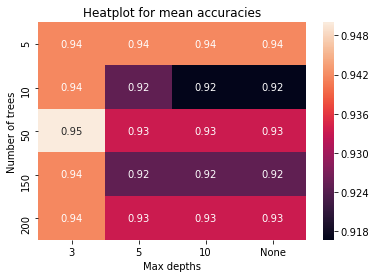

In [11]:
#Plotting Heatmap
x_axis_labels=[3,5,10,'None']
y_axis_labels=[5,10,50,150,200]
a=sb.heatmap(Matrix,xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)
pt.xlabel('Max depths')
pt.ylabel('Number of trees')
pt.title('Heatplot for mean accuracies')

1. As the max depth value increases there is decrease in the accuracy of the train data
2. But for increase in the number of trees there is a fluctucations in the mean accuracy 
3. Thus by selecting max_depth=3 and n_estimators= 50 maximum mean accuracy is obtained(95%)

# Gradient Boosting Classifier

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
Gbc= GradientBoostingClassifier(n_estimators=5,random_state=42,loss='deviance')
Gbc.fit(A_train,B_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

1. Consider a value of n_estimators from n_val set
2. Perform Cross Validation on the model for 80% of train data
3. For each value of n_estimators the model gives the  mean accuracy scores
4. All the values of n_estimators and  mean accuracies are stored in data frame and printed as below.

In [13]:
#Performimg 10-fold cross validation
result_list = []
n_val = [5, 10, 50, 150, 200]
for i in n_val:
        Gbc= GradientBoostingClassifier(n_estimators=i,random_state=42,loss='deviance')
        Gbc.fit(A_train,B_train)
        val=cross_val_score(Gbc,A_train,B_train,cv=10)
        val.mean()
        result_list.append(val.mean())
df= pa.DataFrame(result_list,n_val,columns = ['Mean Accuracy scores'])
df = df.rename_axis('no. estimators')
df

,Mean Accuracy scores
no. estimators,
5,0.933333
10,0.933333
50,0.925000
150,0.925000
200,0.925000


Text(0, 0.5, 'Accuracy')

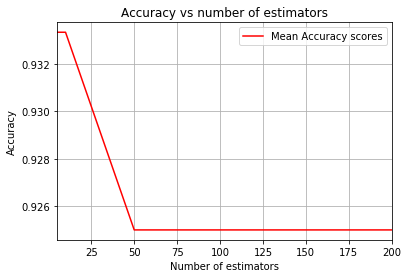

In [14]:
#Plotting graph for above tabular data
df.plot(color='red')
pt.grid()
pt.title('Accuracy vs number of estimators')
pt.xlabel('Number of estimators')
pt.ylabel('Accuracy')

The contribution of the tree are slow down using a technique called shrinkage thus for less values of number of trees the accuracy scores on the train data is more.For values n= 5 and 10 maximum accuracy are obtained.(0.933333)